# Pandas P1 Continued

![more_pandas](https://media.giphy.com/media/KyBX9ektgXWve/giphy.gif)

In [97]:
# You will get very used to these imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Learning Goals:

1. Learn to interact and manipulate dataframe columns
2. Learn to interact and manipulate dataframe row indices
3. Identify and deal with N/A values
4. Visualize data using built in dataframe methods and MPL

There are several well-worn datasets you will come to know: the iris dataset, the boston housing dataset, the heart dataset.  In this notebook, we will look at the Titanic dataset.  As a tool, it is a bit macabre - predicting survival on the ill-fated ship - but it is still very useful.

![leo_titanic](https://media.giphy.com/media/XOY5y7YXjTD7q/giphy.gif)

In [38]:
# The data is in the csv file called titanic.csv
# create a dataframe object using it, and look at the head to start getting familiar with its structure

df = pd.read_csv('titanic.csv')


# 1. Learn to interact and manipulate dataframe columns

Let's take a look at the head of the data frame and the shape, just to get a quick overview.

In [39]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
df.shape

(891, 12)

### Quick knowledge check
We always want to be aware of what a row represents. 

What does each row in the dataframe represent? 

In [41]:
# Type answer here

In [42]:
#__SOLUTION__
'''
A passenger on the RMS Titanic.
'''

'\nA passenger on the RMS Titanic.\n'

Like most things code, there are several ways to view columns.

The first way is to look at the columns attribute of the dataframe.

In [43]:
# We are getting familiar with dataframe attributes: .shape and now .columns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [44]:
# We can confirm that the number of columns matches the second index of the shape attribute

len(df.columns) == df.shape[1]

True

A second way to see the columns is using the built in list() method:

In [45]:
list(df)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

Consider the situation where you want to rename a column in the dataframe. Let's say you are getting tired of remembering that SibSp refers to siblings and spouses. We can rename it like so:

In [46]:
df.rename({'SibSp':'siblings_and_spouses'}, axis=1) # Axis tells the rename method to look for SibSp along the columns axis

,PassengerId,Survived,Pclass,Name,Sex,Age,siblings_and_spouses,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Great. Now print out the head of the df

In [47]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Looks like something did not register.  The column name is back to SibSp. 
A finicky thing about Pandas is the use of inplace.  
In order for the object to be transformed in memory, we need to assign the inplace paramater the value of True

In [48]:
df.rename({'SibSp':'siblings_and_spouses'}, axis=1, inplace=True)

In [49]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,siblings_and_spouses,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We can also change multiple columns at once with a dictionary:

In [50]:
df.rename(columns = {'Parch': 'parent_child_ratio', 'Pclass': 'ticket_class'}, inplace=True)

In [51]:
df.head()

,PassengerId,Survived,ticket_class,Name,Sex,Age,siblings_and_spouses,parent_child_ratio,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We can also interact directly with the .columns attribute


In [52]:
df.columns = [name.lower() for name in list(df)]

If we find a column is not useful, we can drop columns with the drop method.



In [53]:
df.drop('name', axis=1, inplace=True)

# Exercise:
Write code below to drop three columns at once.  Don't include  `inplace=True.`

In [54]:
# your answer here

In [55]:
#__SOLUTION__
df.drop(columns=['cabin','ticket', 'embarked'])

,passengerid,survived,ticket_class,sex,age,siblings_and_spouses,parent_child_ratio,fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000
887,888,1,1,female,19.0,0,0,30.0000
888,889,0,3,female,NaN,1,2,23.4500
889,890,1,1,male,26.0,0,0,30.0000


## 2. Learn to interact and manipulate dataframe row indices


Row indices are an attribute of a dataframe just as columns are.

In [56]:
# This is a RangeIndex object, which can be iterated over
df.index

RangeIndex(start=0, stop=891, step=1)

The index can be set in the same way as columns:

In [57]:
# Note they are the same length
df.index = range(1000, 1891)
df.index

RangeIndex(start=1000, stop=1891, step=1)

We can also reset the index:

In [59]:
df.reset_index(inplace=True, drop=True)

In [60]:
df.head()

,passengerid,survived,ticket_class,sex,age,siblings_and_spouses,parent_child_ratio,ticket,fare,cabin,embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


### Exercise
Use the set_index() dataframe method to set passengerid to the index of the dataframe

In [63]:
# Your code here

In [64]:
#__SOLUTION__
df.set_index('passengerid', inplace=True)

KeyError: "None of ['passengerid'] are in the columns"

## 3. Identify and deal with N/A values

NA (not available) values, are a constant annoyance.  They can mess up our code and our analysis.  One of the first steps of EDA you will perform is looking at whether your data has NA's.  

Apropo to the event it describes, the titanic dataset has many NA values. 

We can see that in a few ways, first using describe.

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
survived                891 non-null int64
ticket_class            891 non-null int64
sex                     891 non-null object
age                     714 non-null float64
siblings_and_spouses    891 non-null int64
parent_child_ratio      891 non-null int64
ticket                  891 non-null object
fare                    891 non-null float64
cabin                   204 non-null object
embarked                889 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB


## Knowledge Check: From the above info() output, which columns have na's? How can you tell?


Your answer here  
$ 

In [66]:
#__SOLUTION__
'''
age, cabin, embarked

We can tell because there are 891 records total, so any rows with a number of non-nulls below that contains nas
'''

'\nage, cabin, embarked\n\nWe can tell because there are 891 records total, so any rows with a number of non-nulls below that contains nas\n'

Another way to see na's is with the **isna()** method

In [68]:
df.isna()

,survived,ticket_class,sex,age,siblings_and_spouses,parent_child_ratio,ticket,fare,cabin,embarked
passengerid,,,,,,,,,,
1,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
887,False,False,False,False,False,False,False,False,True,False
888,False,False,False,False,False,False,False,False,False,False
889,False,False,False,True,False,False,False,False,True,False


More usefully, we can sum the values which are na:

In [69]:
df.isna().sum()

survived                  0
ticket_class              0
sex                       0
age                     177
siblings_and_spouses      0
parent_child_ratio        0
ticket                    0
fare                      0
cabin                   687
embarked                  2
dtype: int64

## Dealing with na's


One way to deal with na's is by dropping rows that have them:


In [71]:
df.dropna()

,survived,ticket_class,sex,age,siblings_and_spouses,parent_child_ratio,ticket,fare,cabin,embarked
passengerid,,,,,,,,,,
2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,female,35.0,1,0,113803,53.1000,C123,S
7,0,1,male,54.0,0,0,17463,51.8625,E46,S
11,1,3,female,4.0,1,1,PP 9549,16.7000,G6,S
12,1,1,female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...
872,1,1,female,47.0,1,1,11751,52.5542,D35,S
873,0,1,male,33.0,0,0,695,5.0000,B51 B53 B55,S
880,1,1,female,56.0,0,1,11767,83.1583,C50,C


Let's explore what happened there. Since we didn't include inplace=True, we can run the same code with some additions to see the difference:

In [72]:
df.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 2 to 890
Data columns (total 10 columns):
survived                183 non-null int64
ticket_class            183 non-null int64
sex                     183 non-null object
age                     183 non-null float64
siblings_and_spouses    183 non-null int64
parent_child_ratio      183 non-null int64
ticket                  183 non-null object
fare                    183 non-null float64
cabin                   183 non-null object
embarked                183 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 15.7+ KB


# Knowledge check
How did drop na affect the dataframe?  Why did it remove so many rows?

In [ ]:
# your answer here

In [ ]:
#__SOLUTION__
'''
dropna run with no paramaters drops any row with an NA in any column. 
'''

Dropna without params reduced our data significantly, which is a very bad thing. Our model performance, when we get to modeling, will heavily rely on having enough data.

Let's add a parameter to dropna:

In [74]:
list(df)

['survived',
 'ticket_class',
 'sex',
 'age',
 'siblings_and_spouses',
 'parent_child_ratio',
 'ticket',
 'fare',
 'cabin',
 'embarked']

In [76]:
df.dropna(subset=['embarked'], inplace=True)

In [77]:
# Now theere are only two columns with na values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 10 columns):
survived                889 non-null int64
ticket_class            889 non-null int64
sex                     889 non-null object
age                     712 non-null float64
siblings_and_spouses    889 non-null int64
parent_child_ratio      889 non-null int64
ticket                  889 non-null object
fare                    889 non-null float64
cabin                   202 non-null object
embarked                889 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 76.4+ KB


You will find that data preprocessing presents you with many paths to follow.  You have many choices you can make as to how to preprocess. 

For now let's make the choice to drop cabin, since it has so many nulls:

In [78]:
df.drop('cabin', axis=1, inplace=True)

With age, let's be a bit more creative, and impute the mean. This is a common method.

In [80]:
df.age.mean()

29.64209269662921

##  Short Exercise
Using the fillna() method, write code below to fill the na's in age with the mean of age.

In [ ]:
# Your code here

In [81]:
#__SOLUTION__
df['age'] = df.age.fillna(df.age.mean())

In [82]:
# Run df.info() to check that you have no more na's.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 9 columns):
survived                889 non-null int64
ticket_class            889 non-null int64
sex                     889 non-null object
age                     889 non-null float64
siblings_and_spouses    889 non-null int64
parent_child_ratio      889 non-null int64
ticket                  889 non-null object
fare                    889 non-null float64
embarked                889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 69.5+ KB


# 4. Visualize data using built in dataframe methods and MPL

Dataframes have some built in methods for visualization.  


## Hist

For example, a very useful one is hist(), 
which will display histograms of each numeric field.


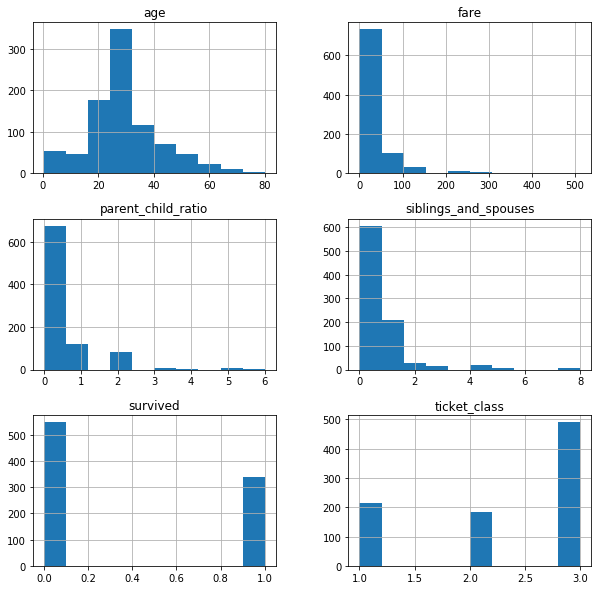

In [85]:
df.hist(figsize=(10,10));

# Boxplot

Another very useful method is boxplot.  One use of boxplot is to quickly see whether there are outliers.

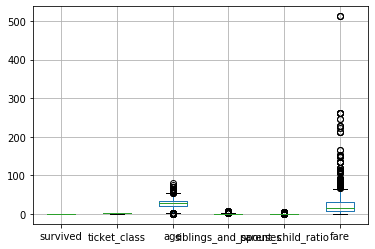

In [90]:
df.boxplot()


These methods are using matplotlib under the hood.  So we can use the same methods we learned before to alter our plots.  Let's use our knowledge of matplotlib to rotate the xticks 45 degrees.

In [ ]:
# Your code here

(array([1, 2, 3, 4, 5, 6]), <a list of 6 Text xticklabel objects>)

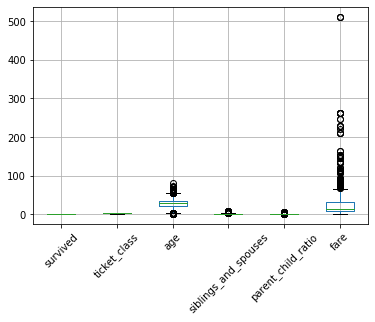

In [92]:
#__SOLUTION__
df.boxplot()
plt.xticks(rotation=45)

# Dataframes and series with Matplotlib and Seaborn

Of course, we can pump in the data held in our dataframes and series to Seaborn.

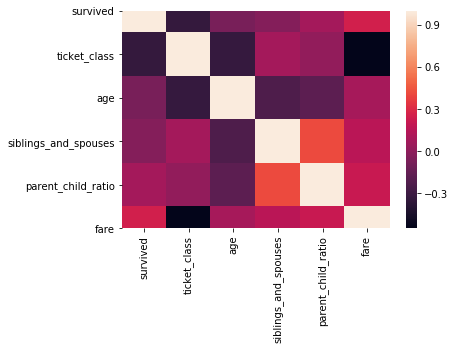

In [98]:
# Correlation Heatmap
sns.heatmap(df.corr())

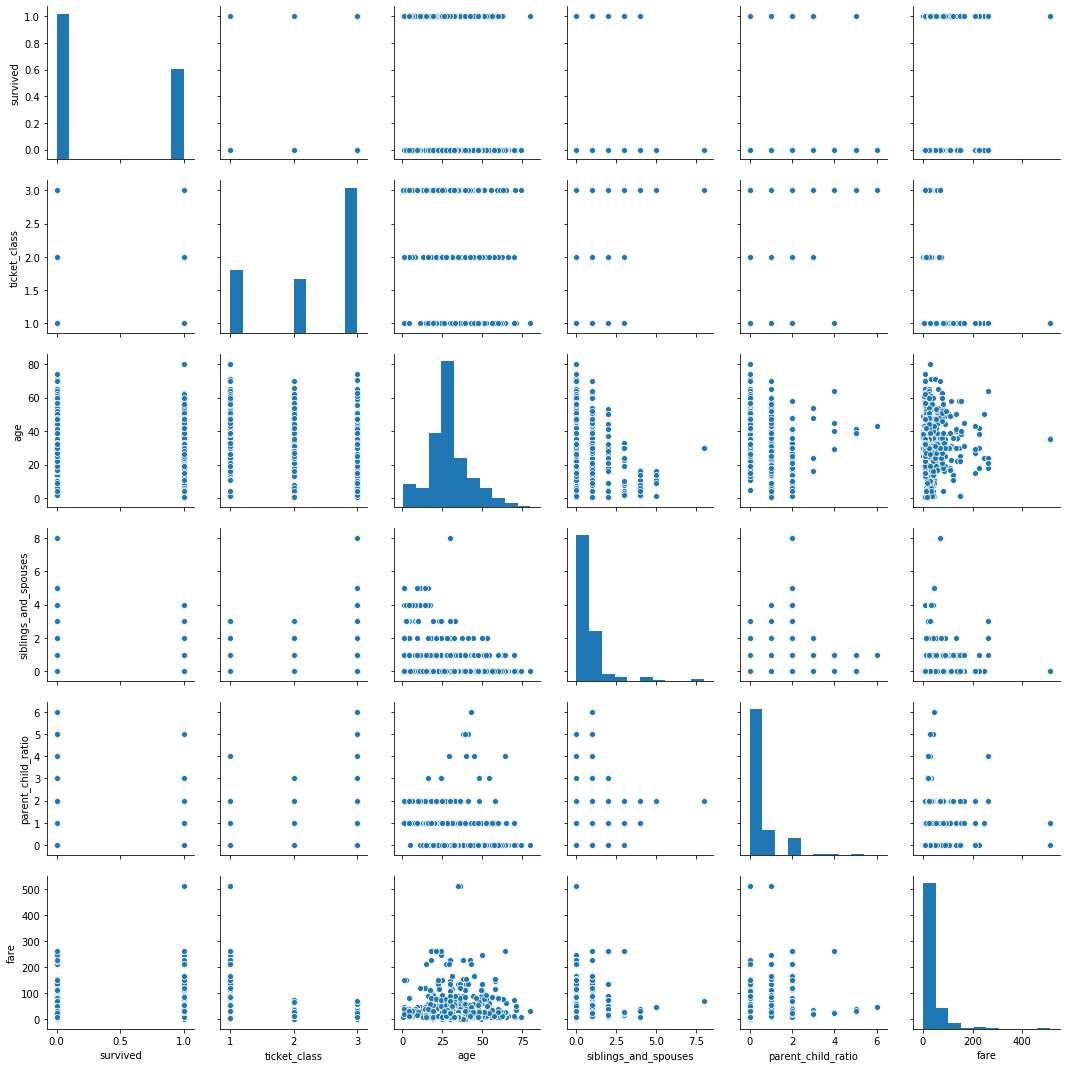

In [99]:
sns.pairplot(df)

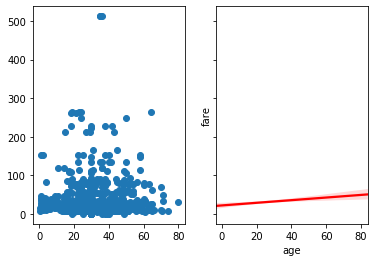

In [110]:
# If we want to zoom in a bit on one of the scatters in pairplot, we can use matplotlib and seaborn.
# Here we can visualize a slight positive correlation between age and fare price
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, sharex=True)

ax1.scatter(df.age, df.fare)
sns.regplot(df.age, df.fare, ax=ax2, color='r', scatter=False)

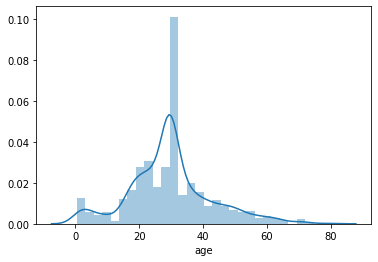

In [112]:
# Use distplot to look at the distribution of the ages
sns.distplot(df.age)

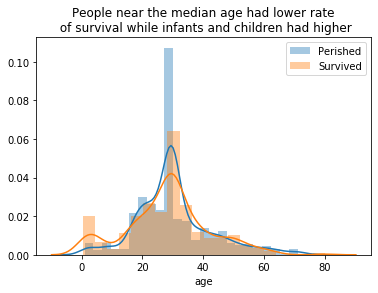

In [128]:
# Use distplot to look at the distribution of ages on subsets of survived vs perished

sns.distplot(df[df['survived']==0].age, label='Perished')
sns.distplot(df[df['survived']==1].age, label='Survived')
plt.title("People near the median age had lower rate\n of survival while infants and children had higher")
plt.legend()

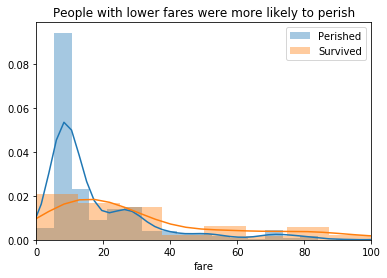

In [133]:
sns.distplot(df[df['survived']==0].fare, label='Perished')
sns.distplot(df[df['survived']==1].fare, label='Survived')
plt.title("People with lower fares were more likely to perish")
plt.xlim(0,100)
plt.legend()

In [134]:
# With the rest of your time,  play around with visualizing some of the titanic data. It's can be pretty fun.